Módulo: Bibliotecas e APIs (Python)<br>
Lista: Matplotlib<br>
Data: 09/2021<br>

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Q1:** Enunciado

Crie um array x com 200 pontos, começando de -10 até 10. Depois calcule as seguintes funções sobre esse array:

y1 = sen(x) / x
y2 = 1 / (1-e^(-x))

Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).

In [2]:
# array x com 200 pontos, começando de -10 até 10
x = np.linspace(-10,10,200)
x

array([-10.        ,  -9.89949749,  -9.79899497,  -9.69849246,
        -9.59798995,  -9.49748744,  -9.39698492,  -9.29648241,
        -9.1959799 ,  -9.09547739,  -8.99497487,  -8.89447236,
        -8.79396985,  -8.69346734,  -8.59296482,  -8.49246231,
        -8.3919598 ,  -8.29145729,  -8.19095477,  -8.09045226,
        -7.98994975,  -7.88944724,  -7.78894472,  -7.68844221,
        -7.5879397 ,  -7.48743719,  -7.38693467,  -7.28643216,
        -7.18592965,  -7.08542714,  -6.98492462,  -6.88442211,
        -6.7839196 ,  -6.68341709,  -6.58291457,  -6.48241206,
        -6.38190955,  -6.28140704,  -6.18090452,  -6.08040201,
        -5.9798995 ,  -5.87939698,  -5.77889447,  -5.67839196,
        -5.57788945,  -5.47738693,  -5.37688442,  -5.27638191,
        -5.1758794 ,  -5.07537688,  -4.97487437,  -4.87437186,
        -4.77386935,  -4.67336683,  -4.57286432,  -4.47236181,
        -4.3718593 ,  -4.27135678,  -4.17085427,  -4.07035176,
        -3.96984925,  -3.86934673,  -3.76884422,  -3.66

In [3]:
# Calcule duas funções a partir dos valores do array x
y1 = np.sin(x)/x
y2 = 1/(1-np.e**(-x))

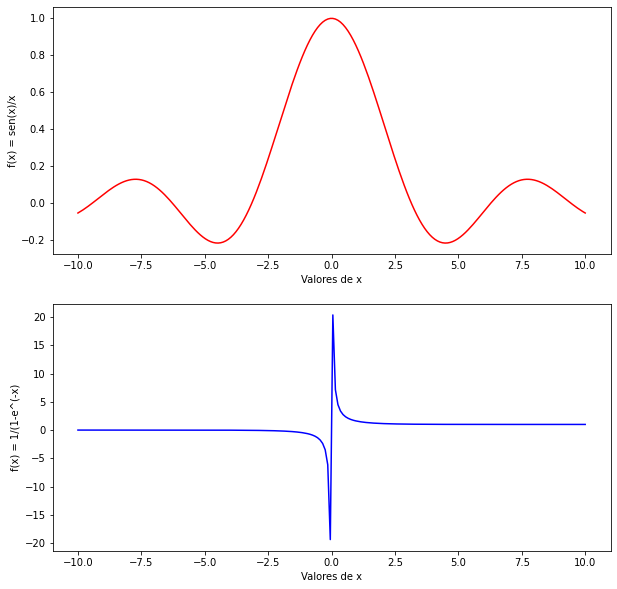

In [4]:
# Plot das duas funções usando subplots, um abaixo do outro
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
axes[0].plot(x, y1, color='red')
axes[0].set_xlabel('Valores de x')
axes[0].set_ylabel('f(x) = sen(x)/x')
axes[1].plot(x, y2, color='blue')
axes[1].set_xlabel('Valores de x')
axes[1].set_ylabel('f(x) = 1/(1-e^(-x)');

**Q2:** Enunciado

Carregue o arquivo avocado.csv e, em seguida, siga as instruções abaixo:

(a) Obtenha apenas os dados desse dataset que são referentes à região da Califórnia (California), no ano de 2017; e salva-os em um novo dataframe.<br>
(b) A partir do dataframe obtido no item (a), obtenha apenas os dados referentes à abacates do tipo convencional; em seguida, salve em um novo dataframe.<br>
(c) Utilizando o dataframe salvo no item (b), crie um gráfico de linha que apresente a variação do preço médio do abacate ao longo do ano de 2017 (datas) na região da Califórnia.<br>
(d) Utilizando o dataframe salvo no item (a), crie um gráfico de pizza que apresente o percentual do volume total de abacates vendidos para cada tipo: convencional e orgânico.<br>

In [5]:
# Carregando o arquivo em df
df = pd.read_csv('avocado.csv')
df.head(2)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional


In [6]:
# a) DF para dados da California em 2017
df_california_2017 = df[(df['region'] == 'California') & (df['year'] == 2017)].reset_index(drop=True)
df_california_2017.head(3)

,Date,AveragePrice,Total Volume,year,region,type
0,2017-12-31,0.93,7132711.23,2017,California,conventional
1,2017-12-24,1.13,5346535.57,2017,California,conventional
2,2017-12-17,0.98,6205211.05,2017,California,conventional


**Atenção:** Note a data em ordem cronológica inversa!

In [7]:
# b) DF para dados da California, 2017, somente tipo convencional
df_california_2017_conv = df_california_2017[df_california_2017['type']=='conventional']
# Comparando os shapes para ver a diferença:
df_california_2017.shape, df_california_2017_conv.shape

((106, 6), (53, 6))

In [8]:
# c) Gráfico de linha: variação do preço médio do abacate ao longo do ano de 2017
x = df_california_2017_conv.sort_values('Date')['Date'] # eixo x: datas em ordem cronológica
y = df_california_2017_conv.sort_values('Date')['AveragePrice'] # eixo y: preço médio

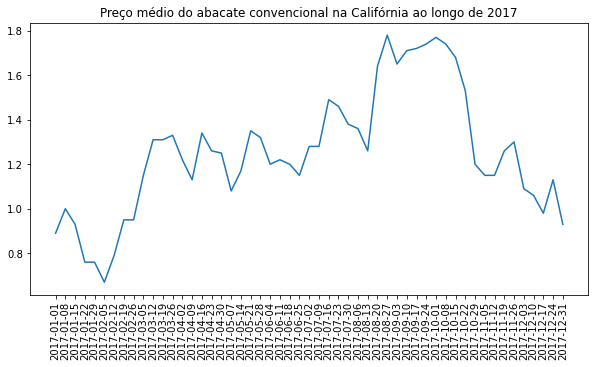

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.title('Preço médio do abacate convencional na Califórnia ao longo de 2017')
plt.xticks(rotation=90);

d) Utilizando o dataframe salvo no item (a), crie um gráfico de pizza que apresente o percentual do volume total de abacates vendidos para cada tipo: convencional e orgânico

In [10]:
df.head(2)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional


In [11]:
# Proporção do volume de cada tipo de abacate
df.groupby('type')['Total Volume'].sum()/df['Total Volume'].sum()

type
conventional    0.971902
organic         0.028098
Name: Total Volume, dtype: float64

Text(0.5, 1.0, 'Percentual do volume total de abacates vendidos nos Estados Unidos por tipo')

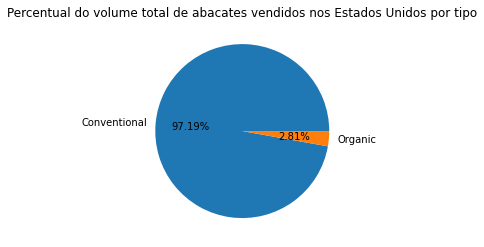

In [12]:
dados = df.groupby('type')['Total Volume'].sum()/df['Total Volume'].sum()
plt.pie(dados,labels=['Conventional','Organic'], autopct='%.2f%%')
plt.title('Percentual do volume total de abacates vendidos nos Estados Unidos por tipo')

**Q3:** Enunciado

Carregue o dataset contido no arquivo cholera-dataset.csv em um objeto DataFrame. Esse dataset contém dados referentes ao número de casos reportados de cólera em cada país, desde 1950 até 2016, além do número de mortes provocadas pela cólera; dentre outras informações.

Após carregar esse dataset, obtenha:

(a) Apenas os dados da Índia.<br>
(b) Crie um gráfico de barras que apresente o número de casos reportados e de mortes causadas pela cólera na Índia, ambos em um mesmo axes, em função do ano.

In [13]:
df_colera = pd.read_csv('cholera.csv')
df_colera.head(3)

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677.0,5.0,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064.0,8.0,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481.0,4.0,0.00,Eastern Mediterranean


a) Apenas os dados da Índia

In [14]:
df_colera_india = df_colera[df_colera['Country']=='India']
df_colera_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 862 to 921
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 60 non-null     object 
 1   Year                                    60 non-null     int64  
 2   Number of reported cases of cholera     60 non-null     float64
 3   Number of reported deaths from cholera  60 non-null     float64
 4   Cholera case fatality rate              60 non-null     float64
 5   WHO Region                              60 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 3.3+ KB


In [15]:
df_colera_india.nunique()

Country                                    1
Year                                      60
Number of reported cases of cholera       60
Number of reported deaths from cholera    56
Cholera case fatality rate                54
WHO Region                                 1
dtype: int64

(b) Crie um gráfico de barras que apresente o número de casos reportados e de mortes causadas pela cólera na Índia, ambos em um mesmo axes, em função do ano.

In [16]:
# eixo x: ano 
x = df_colera_india['Year']

In [17]:
# eixo y1: casos reportados
y1 = df_colera_india['Number of reported cases of cholera']
# eixo y1: mortes reportados
y2 = df_colera_india['Number of reported deaths from cholera']

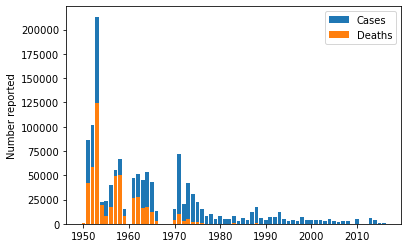

In [18]:
# Gráfico em um único axis
plt.bar(x,y1)
plt.bar(x,y2)
plt.ylabel('Number reported')
plt.legend(['Cases','Deaths']);

**Q4:** Enunciado

Carregue os dados do arquivo googleplaystore.csv e, em seguida:

(a) Crie um gráfico de pizza que apresente o percentual dos gêneros (Genres) dos aplicativos. Como existem muitos gêneros, considere apenas os 10 primeiros. <br>
(b) Crie um gráfico de barras que contenha a quantidade de aplicativos que foram desenvolvidos para cada versão específica (ou conjunto de versões) do Android, especificadas na coluna Android Ver.

In [19]:
# Carregando o DF
df_gplay = pd.read_csv('googleplaystore.csv')
df_gplay.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [20]:
# Verificando se há casos duplicados
df_gplay.shape, df_gplay.drop_duplicates().shape

((10841, 13), (10358, 13))

In [21]:
# Deletando casos duplicados
df_gplay.drop_duplicates(inplace=True)

In [22]:
# Verificando dados faltantes
df_gplay.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [23]:
# Podemos analisar 'Genres': top 10
top10_genres = df_gplay['Genres'].value_counts(normalize=True)[:10]

In [24]:
# Soma da proporção dos restantes
others_genres = df_gplay['Genres'].value_counts(normalize=True)[10:].sum()
others_genres = pd.Series(others_genres,index=['Others'])

In [25]:
top10_genres = top10_genres.append(others_genres)
top10_genres

Tools              0.081290
Entertainment      0.056768
Education          0.050879
Business           0.041224
Medical            0.039390
Productivity       0.039293
Personalization    0.037459
Lifestyle          0.035914
Communication      0.035335
Sports             0.035142
Others             0.547306
dtype: float64

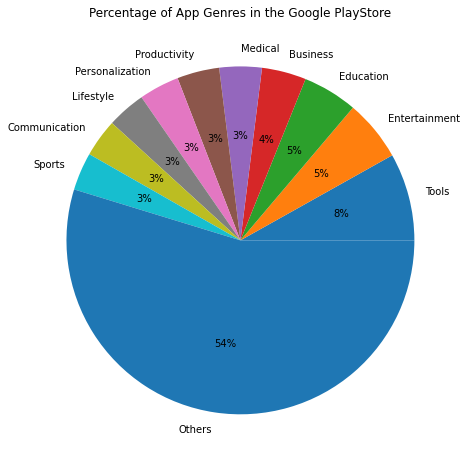

In [26]:
plt.figure(figsize=(8,8))
plt.title('Percentage of App Genres in the Google PlayStore')
plt.pie(top10_genres, autopct='%d%%', labels=top10_genres.index);

(b) Crie um gráfico de barras que contenha a quantidade de aplicativos que foram desenvolvidos para cada versão específica (ou conjunto de versões) do Android, especificadas na coluna Android Ver

In [27]:
df_android_ver = df_gplay['Android Ver'].value_counts().reset_index()
df_android_ver

,index,Android Ver
0,4.1 and up,2379
1,4.0.3 and up,1451
2,4.0 and up,1337
3,Varies with device,1221
4,4.4 and up,894
5,2.3 and up,643
6,5.0 and up,546
7,4.2 and up,387
8,2.3.3 and up,279
9,2.2 and up,239


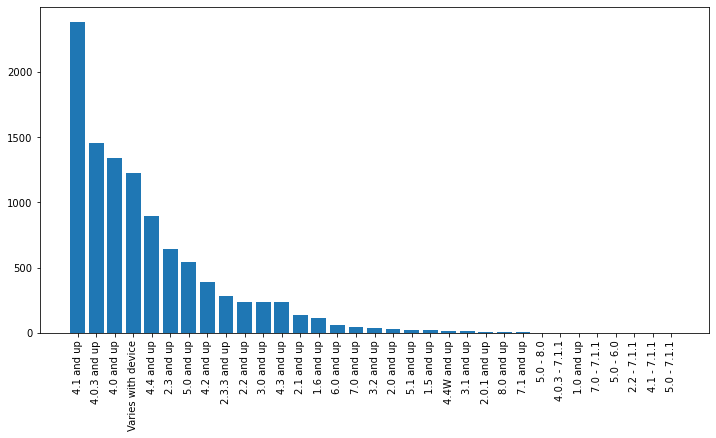

In [28]:
plt.figure(figsize=(12,6))
plt.bar(df_android_ver['index'],df_android_ver['Android Ver'])
plt.xticks(rotation=90);

**Q5:** Enunciado

Carregue o arquivo houses_to_rent.csv. Em seguida:

(a) Crie um gráfico de dispersão para visualizar uma relação entre a área e o preço total do aluguel do imóvel.<br>
(b) Visualize os outliers presentes na coluna da área utilizando o boxplot.<br>
(c) Faça o mesmo que foi solicitado no item anterior, porém, para a coluna do preço total do aluguel.<br>
(d) Elimine os outliers de ambas as colunas utilizando o método quantile. <br>
(e) Crie novamente um gráfico de dispersão dos dados da área e preço total do aluguel do imóvel; dessa vez, após a remoção dos outliers de ambas as colunas. 

In [29]:
# Carregando o df
df_houses = pd.read_csv('houses_to_rent.csv')
df_houses.head(3)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841


**Verificando a consistência do banco de dados**

In [30]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [31]:
# Temos casos duplicados
df_houses.drop_duplicates().shape

(10334, 13)

In [32]:
# Remoção dos duplicados
df_houses.drop_duplicates(inplace=True)

(a) Crie um gráfico de dispersão para visualizar uma relação entre a área e o preço total do aluguel do imóvel.

In [33]:
df_houses.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

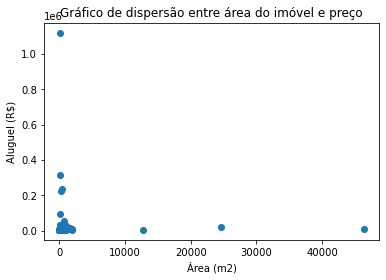

In [34]:
plt.title('Gráfico de dispersão entre área do imóvel e preço')
plt.xlabel('Área (m2)')
plt.ylabel('Aluguel (R$)')
plt.scatter(df_houses['area'], df_houses['total (R$)']);

Podemos fazer um gráfico excluindo os valores extremos de área e preço para observar a maioria dos dados

In [35]:
df_aux = df_houses[(df_houses['area']<10000) & (df_houses['total (R$)']<20000)]

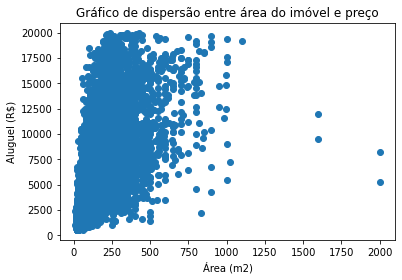

In [36]:
plt.title('Gráfico de dispersão entre área do imóvel e preço')
plt.xlabel('Área (m2)')
plt.ylabel('Aluguel (R$)')
plt.scatter(df_aux['area'], df_aux['total (R$)']);

b) Visualize os outliers presentes na coluna da área utilizando o boxplot

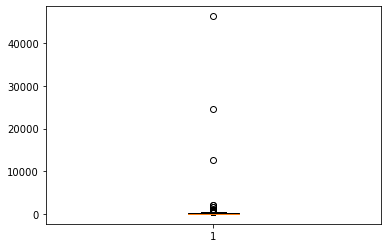

In [37]:
plt.boxplot(df_houses['area']);

In [38]:
df_aux2 = df_houses[df_houses['area']<10000]

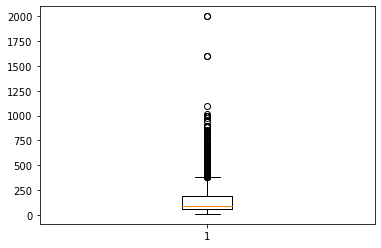

In [39]:
plt.boxplot(df_aux2['area']);

In [40]:
df_aux2['area'].describe()

count    10331.000000
mean       144.384474
std        135.373663
min         11.000000
25%         59.000000
50%         95.000000
75%        190.000000
max       2000.000000
Name: area, dtype: float64

Aproximadamente 75% das áreas estao abaixo de 190 m2.

c) Faça o mesmo que foi solicitado no item anterior, porém, para a coluna do preço total do aluguel.

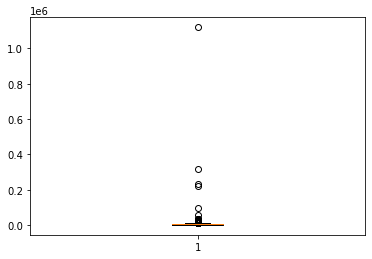

In [41]:
plt.boxplot(df_houses['total (R$)']);

In [42]:
df_houses['total (R$)'].describe()

count    1.033400e+04
mean     5.488943e+03
std      1.266911e+04
min      4.990000e+02
25%      2.116000e+03
50%      3.685500e+03
75%      6.912000e+03
max      1.120000e+06
Name: total (R$), dtype: float64

In [43]:
df_aux3 = df_houses[df_houses['total (R$)']<10000]

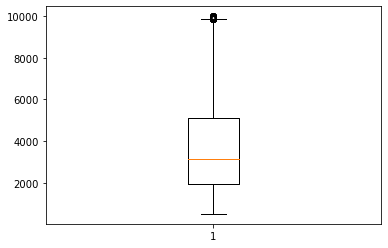

In [44]:
plt.boxplot(df_aux3['total (R$)']);

d) Elimine os outliers de ambas as colunas utilizando o método quantile.

In [45]:
# Utilizamos o quantile 90 para selecionar os dados abaixo desse quantil
print('Antes:',df_houses.shape)
df_houses = df_houses[df_houses['area'] < df_houses['area'].quantile(.9)]
df_houses = df_houses[df_houses['total (R$)'] < df_houses['total (R$)'].quantile(.9)]
print('Depois:',df_houses.shape)

Antes: (10334, 13)
Depois: (8369, 13)


e) Crie novamente um gráfico de dispersão dos dados da área e preço total do aluguel do imóvel; dessa vez, após a remoção dos outliers de ambas as colunas. 

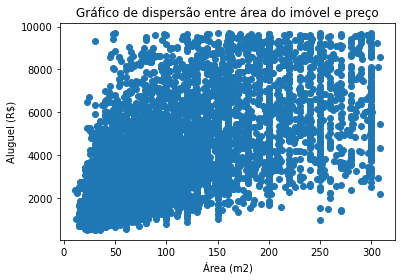

In [46]:
plt.title('Gráfico de dispersão entre área do imóvel e preço')
plt.xlabel('Área (m2)')
plt.ylabel('Aluguel (R$)')
plt.scatter(df_houses['area'], df_houses['total (R$)']);

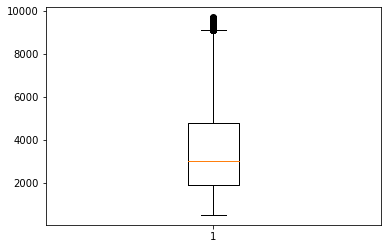

In [47]:
plt.boxplot(df_houses['total (R$)']);

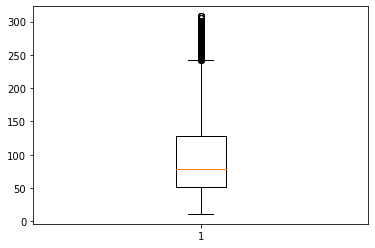

In [48]:
plt.boxplot(df_houses['area']);